<a href="https://www.kaggle.com/code/aicortex/cnn-fashion-mnist-99-accuracy?scriptVersionId=210467132" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="
    text-align: center;
    background: linear-gradient(45deg, #ff9a9e, #fad0c4, #fbc2eb);
    padding: 20px;
    border-radius: 15px;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    co000: #fff;
    font-family: 'Arial', sans-serif;
    animation: glow 3s infinite alternate;
">
  <h1 style="
      font-size: 2.5em;
      font-weight: bold;
      margin: 0;
      text-shadow: 0 0 10px #ffffff, 0 0 20px #ff9a9e, 0 0 30px #fad0c4;
  ">
    🚀 TensorFlow CNN - Accuracy > 99% 🌟
  </h1>
  <p style="
      font-size: 1.2em;
      margin-top: 10px;
  ">
    Master FashionMNIST with Style! 👗👕
  </p>
</div>

<style>
@keyframes glow {
  0% {
    box-shadow: 0 0 5px #ff9a9e, 0 0 10px #fad0c4, 0 0 20px #fbc2eb;
  }
  100% {
    box-shadow: 0 0 20px #ff9a9e, 0 0 40px #fad0c4, 0 0 60px #fbc2eb;
  }
}
</style>


# 📚 Let's Get Started with Imports! 🛠️✨

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

# 🛠️ Loading the FashionMNIST Dataset 📂✨

In [2]:
mnist = tf.keras.datasets.mnist
data = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# ✂️ Preparing the Data for Success 🚀
✨

### 🔄 Splitting the Dataset:
We divide the data into three parts:  
- **Training Set** 🏋️‍♀️: For teaching the model how to recognize patterns.  
- **Validation Set** 🧐: To fine-tune the model and prevent overfitting.  
- **Test Set** ✅: To evaluate how well the model performs on unseen d �⚖️

---

### 🔧 Reshaping the Data:
We add a new dimension to each image to include the **channel** for grayscale data. Now, instead of `(28, 28)`, our data has the shape `(28, 28, 1)`. 🖤  

💡 **Why reshape?**  
Most deep learning frameworks expect images to have a shape like `(Height, Width, Channels)`. For grayscale, the channel is just `1`, but it's essential to maintain consistency when feeding data into convolumodel like a pro! 💪🎉


In [14]:
(train_val_data, train_val_label), (test_data, test_label) = data


train_data, valid_data, train_label, valid_label = train_test_split(train_val_data, 
                                                                    train_val_label, 
                                                                    random_state=42,
                                                                    test_size=0.2, 
                                                                    stratify=train_val_label)

print(train_data.shape, train_label.shape)
print(valid_data.shape, valid_label.shape)
print(test_data.shape, test_label.shape)

train_data = train_data[..., np.newaxis]
valid_data = valid_data[..., np.newaxis]
test_data = test_data[..., np.newaxis]
print('---------------------------')
print(train_data.shape, train_label.shape)
print(valid_data.shape, valid_label.shape)
print(test_data.shape, test_label.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(10000, 28, 28) (10000,)
---------------------------
(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)
(10000, 28, 28, 1) (10000,)


# 🧼 Normalizing the Data 📉✨

To prepare our data for training, we normalize the pixel values to be between `0` and `1`. This helps the model train faster and more efficiently! 🚀

### 💡 Why Normalize?
1. **Better Convergence**: Normalized data helps the optimization algorithm converge more smoothly. 📈  
2. **Consistent Scale**: Keeps all features on the same scale, avoiding dominance by larger pixel values. ⚖️  
3. **Improved Stability**: Reduces the risk of numerical instabilities during training. 🤖


In [15]:
print(train_data.min(), train_data.max())
print(valid_data.min(), valid_data.max())
print(test_data.min(), test_data.max())

train_data = train_data.astype('float32') / 255.0
valid_data = valid_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

print('---------------------------')

print(train_data.min(), train_data.max())
print(valid_data.min(), valid_data.max())
print(test_data.min(), test_data.max())

0 255
0 255
0 255
---------------------------
0.0 1.0
0.0 1.0
0.0 1.0



# 🎨 Data Augmentation and Generators 📊✨


## 🔄 Data Augmentation for Training:
We create an `ImageDataGenerator` for the training data with the following augmentations:
- **Rotation (`rotation_range=10`)**: Images can rotate up to 10 degrees. 🔄  
- **Width Shift (`width_shift_range=0.1`)**: Images can shift horizontally by 10% of their width. ↔️  
- **Height Shift (`height_shift_range=0.1`)**: Images can shift vertically by 10% of their height. ↕️  
- **Zoom (`zoom_range=0.1`)**: Images can zoom in or out by 10%. 🔍  

This adds slight variations to the training data, helping the model handle real-world variations better! 🌍

---

## 🚀 Flowing Data into Generators:
Using `.flow`, we generate batches of data for training, validation, and testing:


- **Training Generator**:
  - Includes augmentations and shuffles the data for randomness. 🔄🎲
- **Validation and Test Generators**:
  - No augmentations, ensuring the data remains consistent for evaluation. 🔍

---

## Why Use This? 🤔
- **Augmentation**: Expands the training dataset virtually without adding new data. 🖼️  
- **Batch Processing**: Feeds data to the model in manageable chunks (batches). 📦  
- **Consistency**: Keeps validation and test datasets unchanged for unbiased evaluation. ✅



In [25]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train = train_datagen.flow(train_data, train_label, batch_size=32, seed=42, shuffle=True)
val = val_datagen.flow(valid_data, valid_label, batch_size=32, shuffle=False)
test = test_datagen.flow(test_data, test_label, batch_size=32, shuffle=False)


# 🏗️ Building and Training the CNN Model 🎨🤖

In [19]:
model = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.InputLayer(shape=(28, 28, 1)),

    # 1st CNN Layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    # 2nd CNN Layer
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    # 3rd CNN Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.4),

    # Flattening Layer
    tf.keras.layers.Flatten(),

    # Fully Connected Layer
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output Layer
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax),
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = [tf.keras.metrics.SparseCategoricalAccuracy])

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=5,                  # Stop training after 3 epochs without improvement
    verbose=1,                   # Print a message when stopping
    mode='min',                  # Looking for the minimum validation loss
    restore_best_weights=True,   # Restore weights from the best epoch
)

history = model.fit(
    train,
    epochs=20,
    validation_data=val,
    callbacks=[early_stopping]  
)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732971120.278740     267 service.cc:145] XLA service 0x79aab00078f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732971120.278814     267 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  15/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 3.0376 - sparse_categorical_accuracy: 0.1888 

I0000 00:00:1732971127.577456     267 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - loss: 0.7933 - sparse_categorical_accuracy: 0.7541 - val_loss: 0.0696 - val_sparse_categorical_accuracy: 0.9791
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.1673 - sparse_categorical_accuracy: 0.9496 - val_loss: 0.0597 - val_sparse_categorical_accuracy: 0.9823
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.1342 - sparse_categorical_accuracy: 0.9598 - val_loss: 0.0803 - val_sparse_categorical_accuracy: 0.9752
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.1047 - sparse_categorical_accuracy: 0.9684 - val_loss: 0.0323 - val_sparse_categorical_accuracy: 0.9902
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0964 - sparse_categorical_accuracy: 0.9702 - val_loss: 0.0418 - val_sparse_categorical_accuracy: 0.9877
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.0454 - val_sparse_categorical_accuracy

# 📊 Visualizing


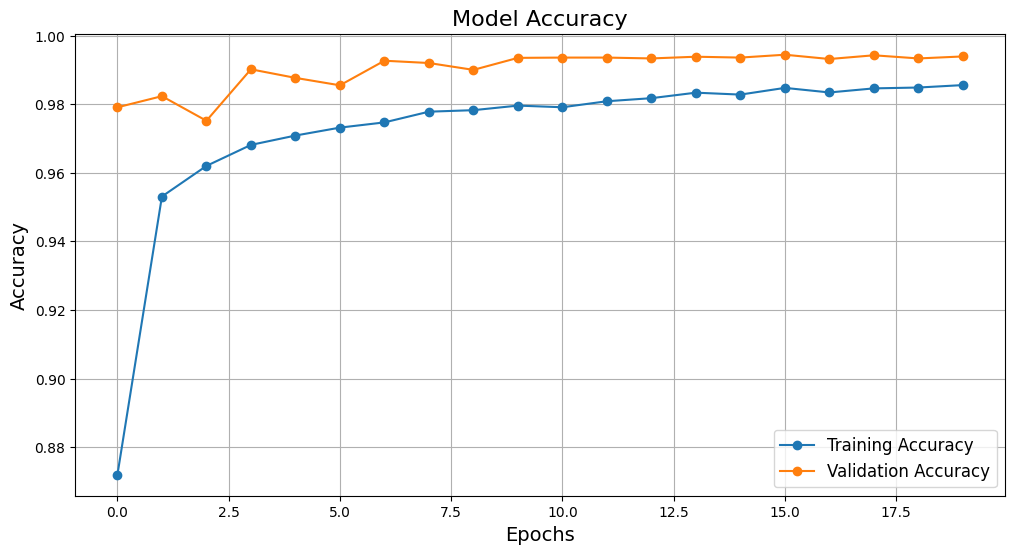

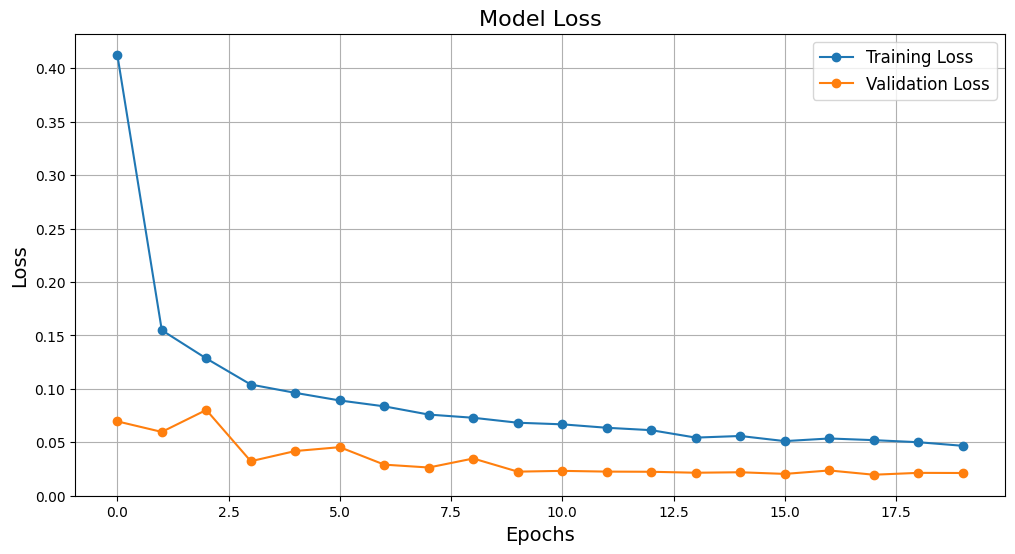

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 🧪 Model Evaluation on the Test Set 📊

In [22]:
model.evaluate(test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0158 - sparse_categorical_accuracy: 0.9939


[0.01390890683978796, 0.9951000213623047]

In [23]:
pred = model.predict(test)
pred_y = pred.argmax(axis=1)
print(classification_report(test.y, pred_y))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



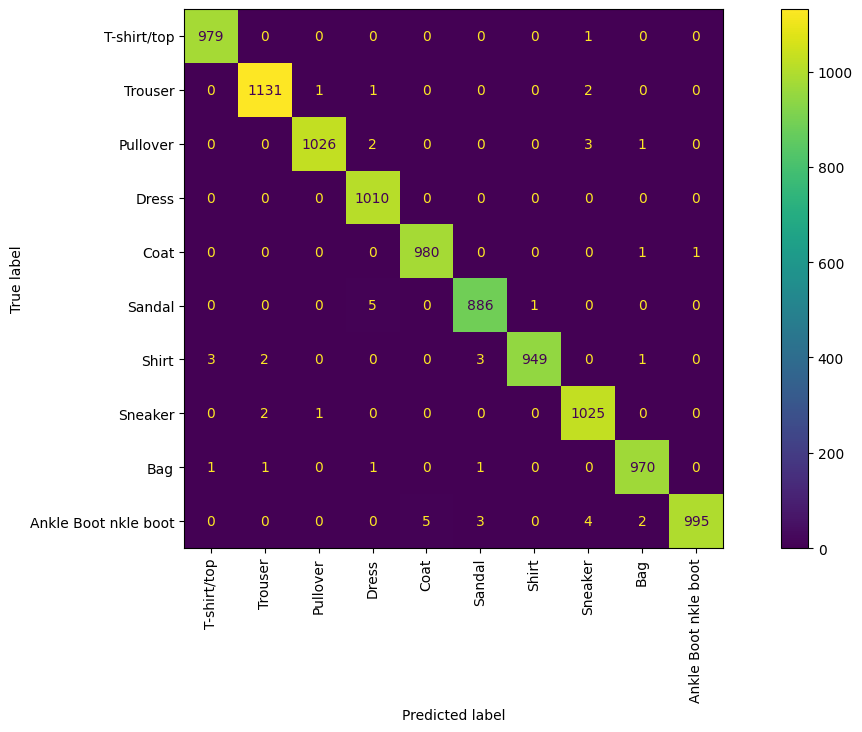

In [24]:
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot nkle boot']

fig, ax = plt.subplots(figsize=(15, 7))

disp = ConfusionMatrixDisplay(confusion_matrix(test.y, pred_y), display_labels=label)
disp.plot(ax=ax)
plt.xticks(rotation = 90)
plt.show()

<div style="
    text-align: center;
    background: linear-gradient(135deg, #ff9a9e, #fad0c4, #fbc2eb);
    color: #000000;
    padding: 20px;
    border-radius: 15px;
    box-shadow: 0 5px 15px rgba(0, 0, 0, 0.2);
    animation: glow 3s infinite alternate;
    font-family: 'Arial', sans-serif;
">
    <h1 style="
        font-size: 2.5em;
        font-weight: bold;
        margin: 0;
    ">
        ⭐ Final Thoughts ⭐
    </h1>
    <p style="
        font-size: 1.2em;
        margin: 15px 0;
        line-height: 1.8;
    ">
        Our CNN model has achieved an impressive <strong>99% accuracy</strong> on the FashionMNIST test set!  
        From preprocessing the data to designing and training the model, it has been a fantastic journey! 🚀🎨  
        We’ve built a robust model that classifies fashion items with precision and style. 👗👕
    </p>
    <p style="
        font-size: 1.2em;
        margin: 15px 0;
        line-height: 1.8;
        font-weight: bold;
    ">
        If you found this useful or enjoyed the process, don’t forget to give an <span style="color: #ff8c00;">✨ upvote ✨</span>!  
        Let’s keep innovating and creating amazing projects together! 💡🌟
    </p>
</div>

<style>
@keyframes glow {
  0% {
    box-shadow: 0 0 5px #ff9a9e, 0 0 15px #fad0c4, 0 0 30px #fbc2eb;
  }
  100% {
    box-shadow: 0 0 20px #ff9a9e, 0 0 40px #fad0c4, 0 0 60px #fbc2eb;
  }
}
</style>
